<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/type2_analysing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#prepare data
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
PATH ='/gdrive/MyDrive/big_2021/data/official'
SEED = 49

In [3]:
import pandas as pd
import numpy as np
import collections
import sklearn

In [95]:
x_test_o = pd.read_csv(PATH + '/type2/X_test.csv', encoding = 'cp949')
x_train_o = pd.read_csv(PATH + '/type2/X_train.csv', encoding = 'cp949')
y_train_o = pd.read_csv(PATH + '/type2/y_train.csv', encoding = 'cp949')

In [96]:
x_test_raw = x_test_o.copy()
x_train_raw = x_train_o.copy()
y_train_raw = y_train_o.copy()

In [97]:
x_train_raw.shape

(3500, 10)

In [98]:
y_train_raw.shape

(3500, 2)

In [99]:
x_test_raw.shape

(2482, 10)

In [100]:
x_test_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [101]:
x_train_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [102]:
y_train_raw.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


#EDA

In [103]:
y_train_raw['gender'].value_counts()

0    2184
1    1316
Name: gender, dtype: int64

여자가 남자보다 약 2배 많은 데이터, 하지만 과적합하기엔 표본이 많다(레이블 불균형 고려 x)

null과 duplicated 데이터를 확인한다

In [104]:
x_train_raw.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [105]:
x_test_raw.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [106]:
y_train_raw.isnull().sum()

cust_id    0
gender     0
dtype: int64

In [107]:
x_train_raw.duplicated().sum()

0

x의 환불금액에 null이 있다. 고객 별 환불금액이니 환불 이력이 없다는 의미. 0으로 치환한다.


In [108]:
x_train_raw['환불금액'].replace(np.nan, 0, inplace = True)
x_train_raw.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

In [109]:
x_test_raw['환불금액'].replace(np.nan, 0, inplace = True)
x_test_raw.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

cust_id를 제외한 데이터의 분포를 살펴본다

In [110]:
x_train_raw[x_train_raw.columns[1:]].describe()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,9.191925e+07,1.966424e+07,8.289786e+06,19.253714,2.834963,0.307246,20.958286
std,1.635065e+08,3.199235e+07,3.010204e+07,27.174942,1.912368,0.289752,24.748682
min,-5.242152e+07,-2.992000e+06,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,4.747050e+06,2.875000e+06,0.000000e+00,2.000000,1.666667,0.027291,4.000000
50%,2.822270e+07,9.837000e+06,0.000000e+00,8.000000,2.333333,0.256410,13.000000
75%,1.065079e+08,2.296250e+07,2.642250e+06,25.000000,3.375000,0.448980,28.000000
max,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


In [111]:
x_train_raw['주구매상품'].value_counts()

기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
육류         57
모피/피혁      57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
아동         40
피혁잡화       40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
란제리/내의      8
대형가전        8
식기          7
액세서리        5
침구/수예       4
통신/컴퓨터      3
보석          3
남성 트랜디      2
소형가전        2
악기          2
Name: 주구매상품, dtype: int64

In [112]:
x_train_raw['주구매지점'].value_counts()

본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
센텀시티점       6
울산점         6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [113]:
set(x_test_raw['주구매상품'].value_counts().index).difference(set(x_train_raw['주구매상품'].value_counts().index))

set()

In [114]:
set(x_test_raw['주구매지점'].value_counts().index).difference(set(x_train_raw['주구매지점'].value_counts().index))

set()

범주 변환 시 oob 에러는 일어나지 않는다

get_dummies하기엔 너무 많은 범주형 변수. 각 변수에 정수를 할당한다

In [115]:
changedict_sangpoom = {}
for idx, key in enumerate(x_train_raw['주구매상품'].value_counts().index):
    changedict_sangpoom[key] = changedict_sangpoom.get(key, 0) + idx

In [116]:
changedict_jijum = {}
for idx, key in enumerate(x_train_raw['주구매지점'].value_counts().index):
    changedict_jijum[key] = changedict_jijum.get(key, 0) + idx

In [117]:
x_train_raw['주구매지점'] = x_train_raw['주구매지점'].replace(changedict_jijum)

In [118]:
x_test_raw['주구매지점'] = x_test_raw['주구매지점'].replace(changedict_jijum)

In [119]:
x_train_raw['주구매상품'] = x_train_raw['주구매상품'].replace(changedict_sangpoom)

In [120]:
x_test_raw['주구매상품'] = x_test_raw['주구매상품'].replace(changedict_sangpoom)

In [121]:
x_train_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,0,6,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,11,1,2,1.500000,0.000000,1
2,2,3197000,1639000,0.0,15,14,2,2.000000,0.000000,1
3,3,16077620,4935000,0.0,0,7,18,2.444444,0.318182,16
4,4,29050000,24000000,0.0,38,0,2,1.500000,0.000000,85


In [122]:
x_test_raw.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,10,3,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,2,1,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,1,0,101,14.623762,0.083277,3
3,3503,7594080,5225000,0.0,22,3,5,2.000000,0.000000,47
4,3504,1795790,1411200,0.0,6,9,3,2.666667,0.125000,8


분류가 잘 되는 데이터인지 아닌지 확인하는 작업은 생략

상관계수 측정(다중공선성 확인)

In [123]:
tmp = pd.concat([x_train_raw, y_train_raw], axis = 1)
tmp.drop('cust_id', axis = 1, inplace = True)
tmp.corr()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
총구매액,1.000000,0.700080,0.467686,-0.137667,0.005441,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,0.700080,1.000000,0.429504,-0.091331,-0.018803,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.467686,0.429504,1.000000,-0.062095,0.009513,0.377570,-0.003871,-0.024707,-0.137362,-0.114327
주구매상품,-0.137667,-0.091331,-0.062095,1.000000,-0.037408,-0.255051,-0.287413,0.039600,0.033833,0.130923
주구매지점,0.005441,-0.018803,0.009513,-0.037408,1.000000,0.024101,0.118926,0.023203,-0.013568,0.010559
내점일수,0.659084,0.374147,0.377570,-0.255051,0.024101,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,0.090022,0.018980,-0.003871,-0.287413,0.118926,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.014396,0.022277,-0.024707,0.039600,0.023203,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,-0.212944,-0.115837,-0.137362,0.033833,-0.013568,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.150141,-0.114323,-0.114327,0.130923,0.010559,-0.155000,-0.043917,0.073598,0.041450,1.000000


총구매액, 최대구매액이 상관도가 높으나 0.9 이하는 제거하지 않기로 결정.

In [124]:
tmp = x_train_raw.copy()
mapper = {'총구매액': 'total_purchase', '최대구매액': 'max_purchace', '환불금액': 'refund', '주구매상품': 'main_merch', '주구매지점': 'main_office', '내점일수': 'visit', '내점당구매건수': 'purchace_per_visit', '주말방문비율': 'weekend_visit_ratio', '구매주기': 'purchace_period'}
tmp = tmp.rename(mapper, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc93acb8c90>,
      dtype=object)

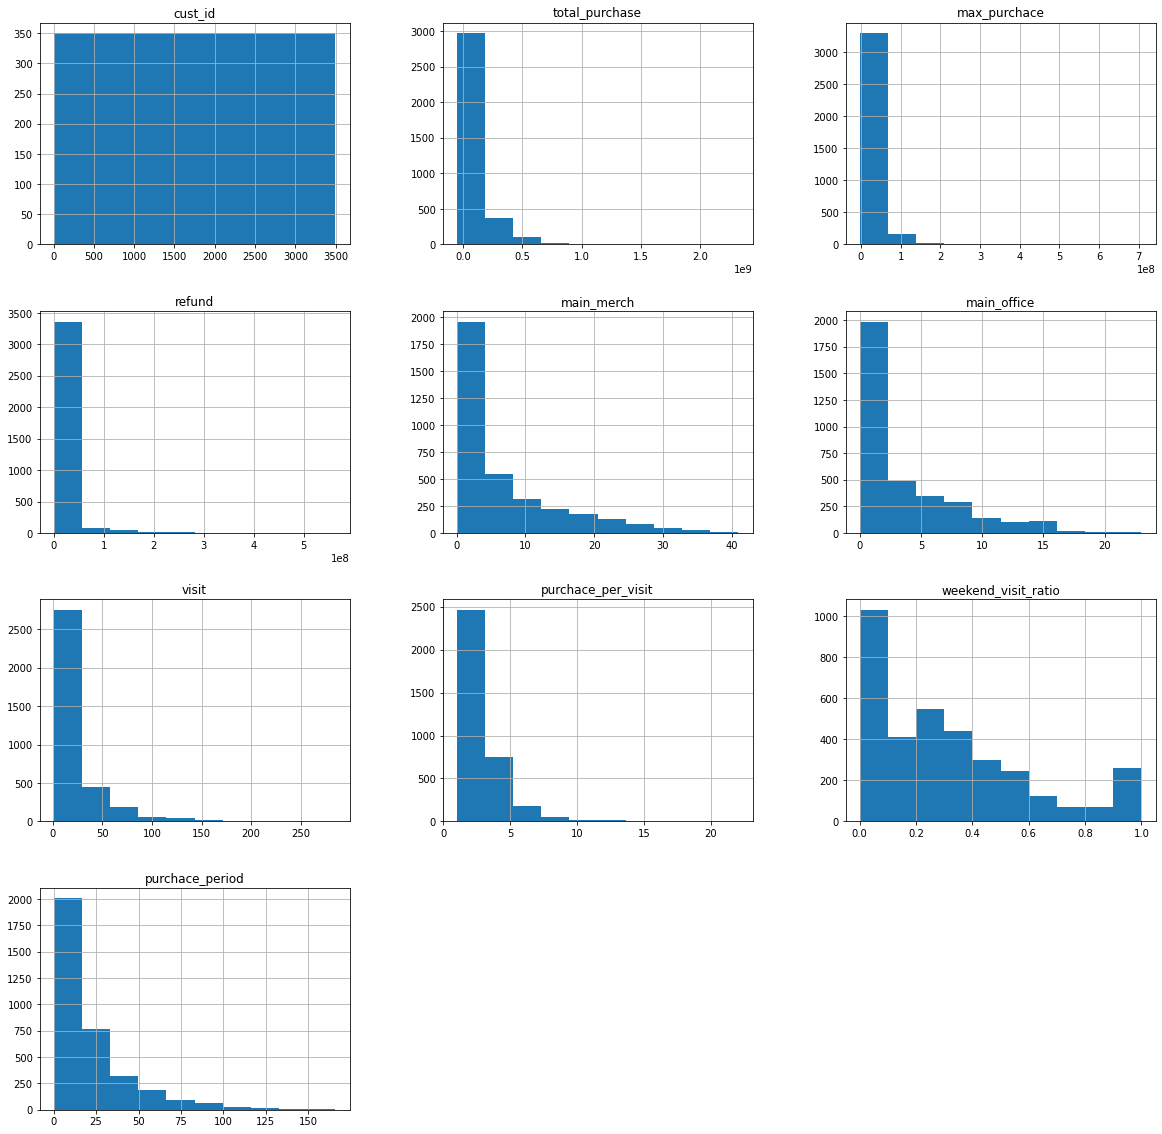

In [125]:
tmp.hist(figsize = (20, 20))

스케일링

In [151]:
from sklearn.model_selection import train_test_split

x = x_train_raw[x_train_raw.columns[1:]].copy()
y = y_train_raw['gender'].copy()

x_train, x_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x, y, random_state = SEED, test_size = 0.1, stratify = y)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(3150, 9) (350, 9) (3150,) (350,)


In [152]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_valid = std.transform(x_valid)


x_test = std.transform(x_test_raw[x_test_raw.columns[1:]])

knn classifier, 신경망, 랜덤 포레스트, SVM 

데이터 분할

knn classifier

이웃 수 그리드 서칭

In [128]:
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for n in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train.values)
    score = knn.score(x_valid, y_valid.values)
    if best_score < score:
        best_score = score
        print('best param: ', n, 'score: ', score)

best param:  1 score:  0.5514285714285714
best param:  2 score:  0.6285714285714286
best param:  4 score:  0.6428571428571429
best param:  6 score:  0.6542857142857142
best param:  9 score:  0.6657142857142857
best param:  13 score:  0.6714285714285714


In [143]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train.values)
train_score = knn.score(x_train, y_train.values)
valid_score = knn.score(x_valid, y_valid.values)

print(train_score, valid_score)

0.6838095238095238 0.6114285714285714


신경망

In [82]:
from sklearn.neural_network import MLPClassifier

best = 0
for n in range(1, 100):
    mlp = MLPClassifier(learning_rate_init = 0.01, random_state = SEED, max_iter = 1000, hidden_layer_sizes = [n, n])
    mlp.fit(x_train, y_train)
    train_score = mlp.score(x_train, y_train)
    valid_score = mlp.score(x_valid, y_valid)

    if valid_score > best:
        best = valid_score
        print(f'trainscore: {train_score}  validscore: {valid_score}  N = {n}')

trainscore: 0.6377777777777778  validscore: 0.6428571428571429  N = 1
trainscore: 0.6476190476190476  validscore: 0.6485714285714286  N = 3
trainscore: 0.6612698412698412  validscore: 0.6571428571428571  N = 5
trainscore: 0.7676190476190476  validscore: 0.66  N = 24
trainscore: 0.8968253968253969  validscore: 0.6714285714285714  N = 60
trainscore: 0.9041269841269841  validscore: 0.68  N = 61


In [142]:
mlp = MLPClassifier(learning_rate_init = 0.01, random_state = SEED, max_iter = 1000, hidden_layer_sizes = [61, 61])
mlp.fit(x_train, y_train)
train_score = mlp.score(x_train, y_train)
valid_score = mlp.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.626984126984127  validscore: 0.6228571428571429 


트리

In [146]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000, random_state = SEED, max_depth=20)
forest.fit(x_train, y_train)
train_score = forest.score(x_train, y_train)
valid_score = forest.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.9993650793650793  validscore: 0.6657142857142857 


In [165]:
from sklearn.ensemble import GradientBoostingClassifier
forest = GradientBoostingClassifier(n_estimators = 20, random_state = SEED, max_depth=5, learning_rate=0.1)
forest.fit(x_train, y_train)
train_score = forest.score(x_train, y_train)
valid_score = forest.score(x_valid, y_valid)

print(f'trainscore: {train_score}  validscore: {valid_score} ')

trainscore: 0.7422222222222222  validscore: 0.6485714285714286 
